## Projeto Integrado - Online Ice Games Store 🎮

Este estudo do caso tem como objetivo simular uma análise da loja Online Ice, que possui segmentação na venda de jogos de videogame, sua abrangência de comercialização de produtos é o mundo todo. 

Como características para este produto, as avaliações de histórico de vendas de jogos estão disponíveis em fontes abertas, sendo assim iremos acessar estes dados para identificar padrões que determinam se um jogo tem sucesso ou não. 

Desta forma isso permitirá ter maior visibilidade de grandes vencedores de vendas e/ou melhores avaliações para planejar campanhas publicitárias. 


### Organização geral sobre este estudo de caso

- Realizar a leitura compõe a verificação e substituição de nomes de colunas
- Conversão de tipos de dados para ajustes, assim como a descrição do tipo de dados
- Tratativa de dados ausentes, uma breve análise descritiva com somatório de vendas sobre regiões e jogos
- Análise exploratória e profunda, realizar abertura de dados sobre diferentes características baseado na análise dos dados fornecidos
- Verificação de lançamento de jogos assim como suas datas, como que as vendas se comportam de plataforma para outra, identificar plataformas mais populares
- Analisar melhores períodos de tempos para serem analisados, assim como dar visibilidade para as plataformas que estão liderando esse mercado gerando maior lucratividade
- Realizar estudos estatísticos detalhados, contemplar a  avaliação dos usuários e profissionais afetam as vendas dentro de plataformas populares
- Comparar vendas dos mesmos jogos em outras plataformas, identificar gênero de jogos, sua lucratividade
- Realizar testes de hipóteses com objetivo de embasar as análises de vendas e avaliações de plataformas, dar visibilidade de informações na conclusão final e sugestões para a empresa  


### Importe de bibliotecas 📚

In [1]:
# carregando todas as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from plotly.tools import FigureFactory as ff
#import emoji
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

### Carregamento de dados 👆

In [2]:
# realizando o carregamento de dados e verificando as primeiras e últimas linhas da base de dados
data = pd.read_csv('dados/games.csv')
# verificação das primeiras e ultimas linhas do dataset
data

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

###  🔍 Análise Exploratória dos Dados  - EDA

#### Descrição de dados

- Name (nome)
- Platform (plataforma)
- Year_of_Release (Ano de lançamento)
- Genre(gênero)
- NA_sales (vendas norte-americanas em milhões de USD)
- EU_sales (vendas na Europa em milhões de USD)
- JP_sales (vendas no Japão em milhões de USD)
- Other_sales (vendas em outros países em em milhões de USD)
- Critic_Score - (Pontuação crítica) (máximo de 100)
- User_Score - (Pontuação do usuário) (máximo de 10)
- Classificação (ESRB)

***obs: O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.***

In [3]:
# alterando colunas para letras minúsculas
data = data.rename(str.lower, axis='columns')
data.head(3)

name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   
2     Mario Kart Wii      Wii           2008.0    Racing     15.68     12.76   

   jp_sales  other_sales  critic_score user_score rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E

In [4]:
# segue impressão das informações gerais/resumidas sobre o DataFrame dos planos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Logo no início, é possível verificar nas primeiras linhas do conjunto de dados, utilizando a função info, que existem dados ausentes em algumas variáveis e tipos de dados incorretos. Por exemplo, a variável "year_of_release" está com dados do tipo float, quando o correto seria inteiro. Nos próximos passos, iremos realizar o tratamento desses dados, normalizando-os.

In [5]:
data.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Ao utilizar a função describe, podemos analisar que a base de dados abrange o período de 1980 a 2016, a mediana dos dados em relação aos anos está localizada em 2007, podemos observar que a América do Norte apresenta a maior média de vendas em comparação com outras regiões, enquanto outras regiões apresentam vendas com média inferior, além disso, constatamos que o desvio padrão da avaliação crítica é o maior entre todas as variáveis analisadas até o momento.

In [6]:
# preenchendo os valores ausentes de anos para zero e alterando dado de float para inteiro
data['year_of_release'] = data['year_of_release'].fillna(data["year_of_release"].median())
data['year_of_release'] = data['year_of_release'].astype(int)

In [7]:
# alterando a string 'tbd' para nan e alterado tipo de dado de strig para float
data['user_score'] = data['user_score'].replace('tbd',np.nan).astype(float)

In [8]:
# substiruindo valores ausentes das colunas genre e name com sua característica de moda
data['name'] = data['name'].fillna(data['name'].mode()[0])
data['genre'] = data['genre'].fillna(data['genre'].mode()[0])

In [9]:
# checando se ocorreram as alterações de forma bem sucedida
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [10]:
# checando se existem dados duplicados no dataset
data.duplicated().sum()

0

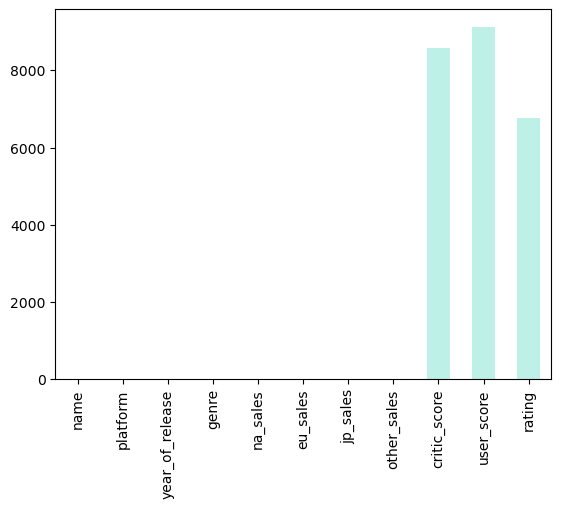

In [11]:
# checando colunas que possuem dados ausentes dentro do dataset
data.isnull().sum().plot(kind='bar',color='#7DE2D1',alpha=0.5);

In [12]:
# Verificando percentual de dados ausentes
tshape = data.shape[0]
tnull = data.isnull().sum()
t = ( tnull / tshape ) * 100
t = pd.DataFrame(t)
t = t.rename(columns={0: 'Percentual de Dados Ausentes'})
t.sort_values(by = 'Percentual de Dados Ausentes', ascending=False)

Percentual de Dados Ausentes
user_score                          54.591684
critic_score                        51.319174
rating                              40.478612
name                                 0.000000
platform                             0.000000
year_of_release                      0.000000
genre                                0.000000
na_sales                             0.000000
eu_sales                             0.000000
jp_sales                             0.000000
other_sales                          0.000000

Ao analisar a base de dados, observamos que existem colunas com valores ausentes. Especificamente, ao examinar as variáveis "critic score", "user score" e "rating" em termos percentuais, identificamos que elas possuem um grande volume de dados ausentes. Essa falta de informações pode comprometer a análise investigativa dessas características.

Para lidar com essa situação, propomos a construção de duas modelagens distintas: uma que considere os dados ausentes e outra que os exclua, substituindo-os por valores compatíveis em cada característica.

Essa abordagem nos permitirá comparar os resultados obtidos com e sem a inclusão dos dados ausentes, fornecendo uma visão mais abrangente e robusta da análise. Ao substituir os valores faltantes por informações adequadas, poderemos mitigar os impactos negativos causados pela falta de dados e obter insights mais confiáveis a partir das características em questão.


### Enriquecendo dados

Para esta seção caso necessário iremos criar novas alternativas para gerar mais característica para nossos dados com objetivo de auxiliar na análise dos dados posteriormente.

In [13]:
# criando uma nova coluna com as vendas totais de todos os paises
data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data ['jp_sales'] + data['other_sales'])
data.head(2)

name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii             2006    Sports     41.36     28.96   
1  Super Mario Bros.      NES             1985  Platform     29.08      3.58   

   jp_sales  other_sales  critic_score  user_score rating  total_sales  
0      3.77         8.45          76.0         8.0      E        82.54  
1      6.81         0.77           NaN         NaN    NaN        40.24

### Análise dos dados  🕵️

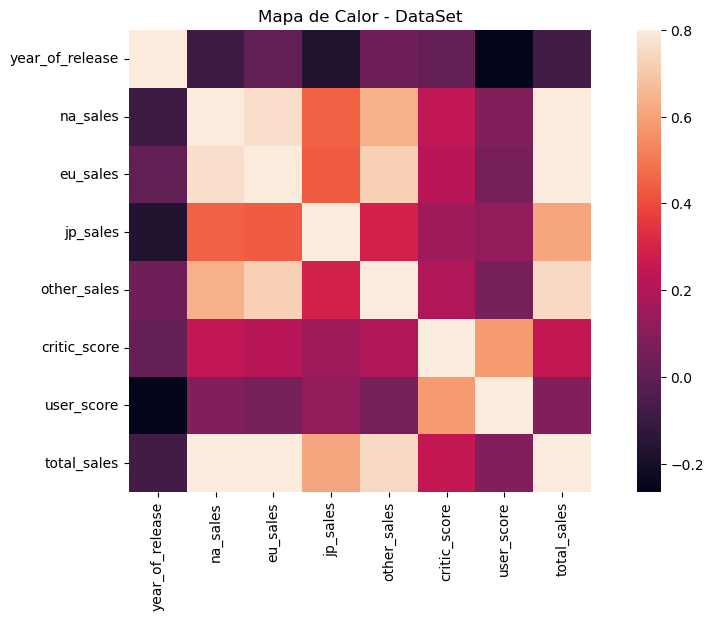

In [14]:
correlacao = data.corr()
plt.figure(figsize=(12,6))
plt.title("Mapa de Calor - DataSet")
sns.heatmap(correlacao, vmax=.8, square=True);

Ao gerar um gráfico de mapa de calor neste início de análise, podemos verificar algumas correlações mais e menos significativas que fornecerão uma visão mais ampla do estudo. Em relação ao longo dos anos, em relação a todas as outras variáveis, a correlação é extremamente baixa, o que significa que há pouco impacto dos anos nas vendas, avaliações e críticas dos usuários.

Quando analisamos as vendas na América do Norte e na Europa, podemos perceber uma forte relação entre as vendas na Europa e uma relação mais fraca com o Japão. Isso significa que quanto mais vendas ocorrem na Europa, tende a haver um aumento nas vendas na América do Norte, mas não necessariamente no Japão ou em outros países. Além disso, há uma baixa relação entre vendas e avaliações/críticas dos usuários, o que indica que esses fatores não têm um impacto direto nas vendas.

No Japão, há uma correlação menor entre as vendas em relação aos outros locais, bem como uma baixa correlação entre as avaliações e críticas dos usuários, que também não impactam significativamente as vendas.

Outros lugares possui uma correlação de vendas com américa do norte e Europa o que da uma margem grande, pois somado estes grandes mercados impactam o resto dos demais lugares, quanto mais vendas eles possuírem, impactam positivamente na alavancagem de vendas nos outros lugares (países), assim como demais não tem impacto de vendas em relação as criticas e avaliações de usuários. 

Observação importante para todos mercados analisados, possuem uma baixa correlação de vendas em relação a criticas e avaliações de usuários.

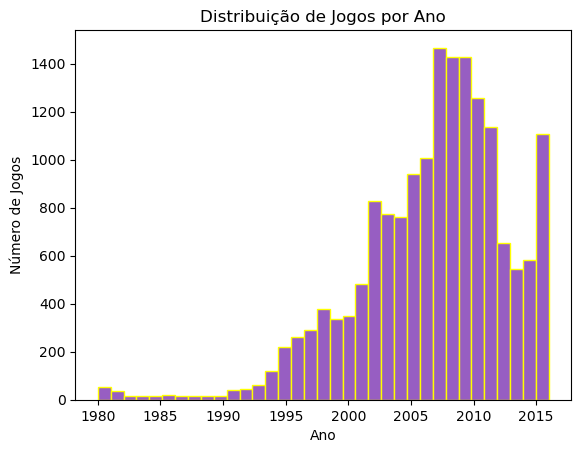

In [15]:
#-------------------Estilizando Gráfico-----------------------#
data.hist(['year_of_release'],bins=35, color='#975EC2', edgecolor='yellow',grid=False);
plt.title('Distribuição de Jogos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos');

O histograma acima claramente evidencia uma maior frequência de jogos nos anos de 2007 a 2010. Vamos realizar uma análise mais detalhada, abrindo os dados ano a ano, para investigar melhor essa frequência.

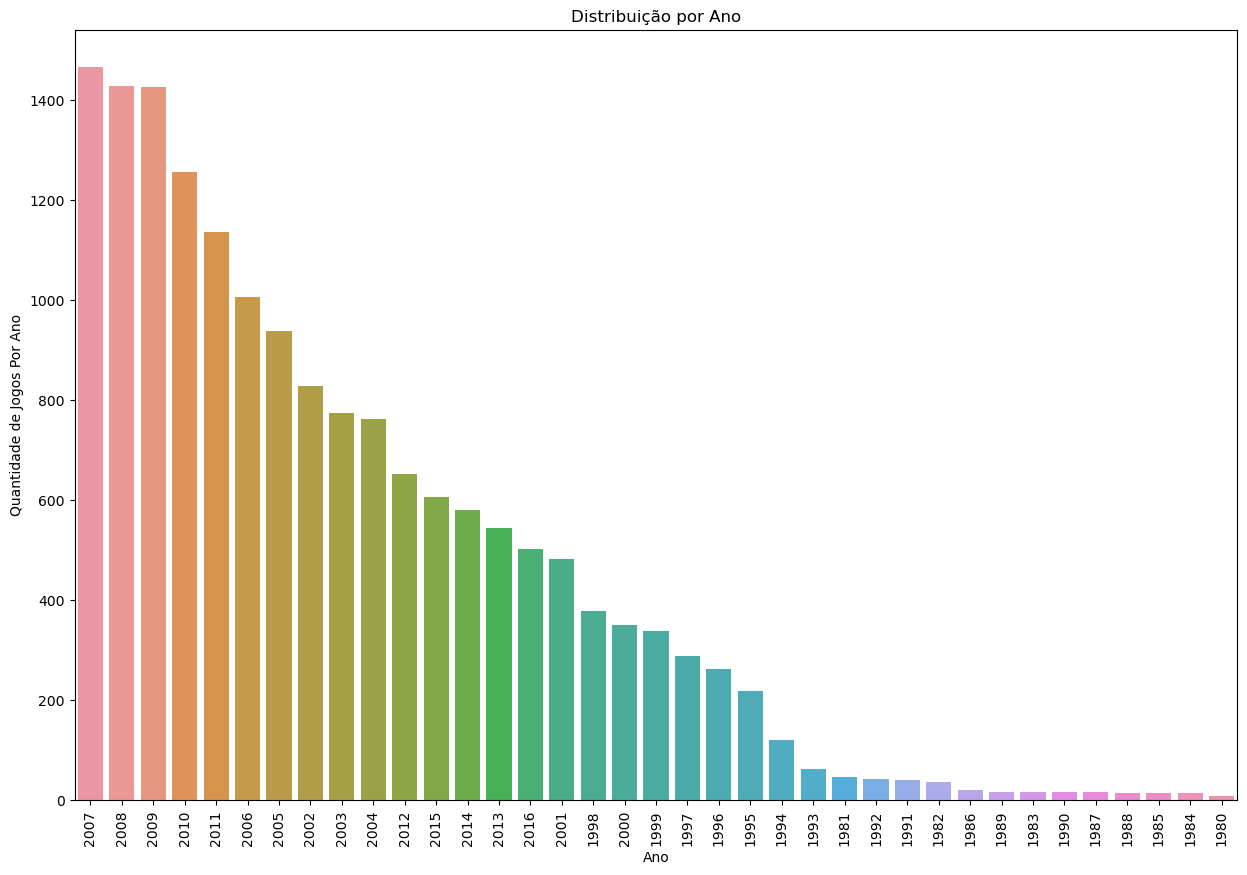

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x="year_of_release", data=data, order = data.groupby(by=['year_of_release'])['name'].count().sort_values(ascending=False).index);
#-------------------Estilizando Gráfico-----------------------#

plt.xticks(rotation=90);
plt.title('Distribuição por Ano');
plt.ylabel('Quantidade de Jogos Por Ano');
plt.xlabel('Ano');

Ao analisar a base de dados de distribuição de jogos ao longo de um período de 35 anos, iniciando em 1980, observamos uma frequência mínima na década de 80. No entanto, a partir do meio da década de 90, houve um aumento expressivo na distribuição de jogos, destacando-se especialmente os anos de 1999, 2004 e um pico significativo em entre 2008 a 2010.

Após o pico em 2010, ocorreu uma grande queda na distribuição de jogos, e os anos seguintes apresentaram uma distribuição menos expressiva em comparação com os anos anteriores a 2010.

Essa análise nos permite identificar padrões de distribuição de jogos ao longo do tempo, com períodos de crescimento e declínio. Essas informações podem ser úteis para compreender as tendências da indústria de jogos e auxiliar na tomada de decisões estratégicas relacionadas ao desenvolvimento e lançamento de novos jogos.

In [17]:
# construindo gráfico com genero de jogos mais vendidos por genero
plt.figure(figsize=(14,8))
#-------------------Estilizando Gráfico-----------------------#
sns.countplot(data=data, x = 'genre', order = data['genre'].value_counts().index);
plt.title('Vendas Games x Gênero');


Ao analisar os dados de vendas por segmentação de gênero e independente da plataforma de jogos, observamos que globalmente a presença de 12 gêneros de jogos. Uma constatação importante é que os jogos de ação apresentam as vendas mais elevadas, seguidos pelos jogos de esportes. Por outro lado, os jogos de estratégia e puzzle são os menos vendidos. Os demais gêneros encontram-se em um patamar intermediário de vendas em comparação com os mais populares.

Essa análise nos permite identificar claramente quais gêneros de jogos têm maior aceitação e demanda por parte dos consumidores. Os jogos de ação e esportes despontam como as principais preferências do público, enquanto os jogos de estratégia e puzzle têm uma demanda relativamente menor.

Essa informação é valiosa para o planejamento e a estratégia de lançamento de novos jogos, permitindo que as empresas do setor ajustem suas decisões de produção e marketing de acordo com as preferências do público-alvo. Além disso, essa análise também pode auxiliar na identificação de oportunidades de mercado, destacando gêneros que possam ter um potencial de crescimento ainda não explorado.

### 🚀 Histórico de Vendas Por Ano e Lançamento de Jogos

Para avançarmos neste próximo passo, iremos analisar os dados dos últimos 35 anos, verificando o total de vendas realizadas e o número de jogos lançados por ano. Esse estudo fornecerá uma visão mais precisa da quantidade de jogos lançados e da rentabilidade geral ao longo dos anos.

In [18]:
# fatiando os dados em relação ao longo dos anos para analisar as vendas
years_df = (data.groupby("year_of_release")[["total_sales"]].sum()
            .join(data.groupby("year_of_release")[["name"]].count()))
years_df.columns = ["total_sales", "number_of_games"]

In [19]:
# criando dados para a linha para mostrar total de vendas por ano
linha_1 = go.Scatter(x=years_df.index, y=years_df["total_sales"], name="Total de Vendas")

# criando dados para a linha para mostrar total jogos lançados por ano
linha_2 = go.Scatter(x=years_df.index, y=years_df["number_of_games"], name="Número de Jogos Por Ano")

# agrupando em novo array para gerar gráfico de duas linhas
d = [linha_1, linha_2]

#-------------------Estilizando Gráfico-----------------------#

legend = {"title": "Total de Vendas x Total de Jogos por Ano"}
fig = go.Figure(data=d, layout=legend)
iplot(fig, show_link=False)

Ao longo dos anos, observa-se um aumento exponencial no número de jogos lançados anualmente, o que resulta em um crescimento correspondente nas vendas e na rentabilidade das plataformas de jogos. Notavelmente, a partir dos anos 2000, essa tendência se tornou mais acentuada para ambos os indicadores. O ápice foi alcançado nos anos de 2008 a 2010. No entanto, nos anos subsequentes, observou-se uma queda brusca, que será investigada neste estudo.

### Plataformas que mais venderam ao longo de 35 anos  💵

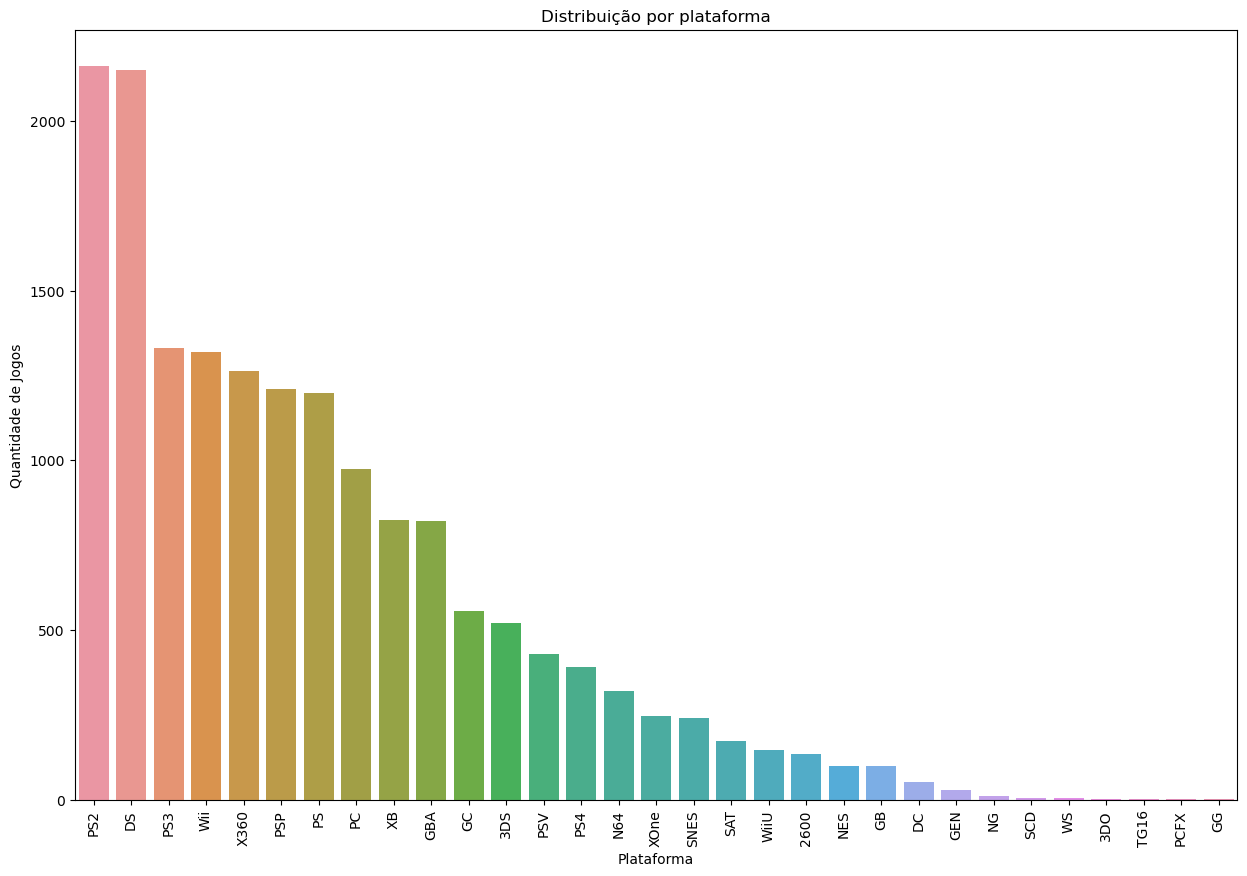

In [20]:
plt.figure(figsize=(15, 10))
#-------------------Estilizando Gráfico-----------------------#
sns.countplot(x="platform", data=data, order = data.groupby(by=['platform'])['name'].count().sort_values(ascending=False).index);
plt.xticks(rotation=90);
plt.title('Distribuição por plataforma');
plt.ylabel('Quantidade de Jogos');
plt.xlabel('Plataforma');

Dispomos de um total de 31 plataformas de jogos em nossa análise. Ao considerar o destaque das plataformas, podemos identificar as cinco principais, que são: PS2, DS, PS3, Wii e X360. Essas plataformas apresentaram um desempenho notável em termos de popularidade e vendas.

Por outro lado, também temos as cinco plataformas com menor visibilidade, que são: WS, 3DO, TG16, GG e PCFX. Essas plataformas tiveram uma presença mais discreta no mercado, com menor destaque em termos de vendas e popularidade.

Essa análise nos permite compreender melhor o cenário das plataformas de jogos, identificando aquelas que se destacam e aquelas que têm uma visibilidade mais limitada. Essas informações são valiosas para as empresas do setor, permitindo que elas tomem decisões mais informadas ao desenvolver e lançar jogos, levando em consideração a preferência do público e as plataformas mais relevantes no mercado.

In [21]:
# gráfico scatter matrix
df2 = data.loc[:,["year_of_release","platform"]]
df2["index"] = np.arange(1,len(data)+1)
fig = ff.create_scatterplotmatrix(df2, diag='box', index='index',colormap='YlOrRd',
                                  colormap_type='seq',
                                  height=500, width=700)
iplot(fig)

O gráfico de scatter matrix gerou informações interessantes, permitindo visualizar plataformas que tiveram destaque em determinados anos ou décadas, mas que atualmente não apresentam mais vendas significativas e/ou estão em declínio. A seguir, apresentarei uma análise dividida por décadas para facilitar a interpretação.

### 🕹️ Uma timeline na história dos games para analisar a importância dos gráficos que contam uma história ….. baseado no gráfico scatter matrix 🕹️


#### 📢 Uma olhada na história 🔎 Década 80

Para a década de 80 inicia-se a corrida aos games e tivemos duas plataformas de maior destaque e liderança em games que foram o Atari (2600) e NES (Nintendo), com games que mostram bem o comportamento distintos dos usuários naquela década, que foram os famosos games de console portátil e o atari que já era um console fixo onde se trocavam as ‘cartuchos’, isto é os games. 

E já no fim dos anos 80 vemos a Game Boy (GB), despontando com seus jogos portáteis, mas vamos falar mais desta plataforma na próxima década de 90.


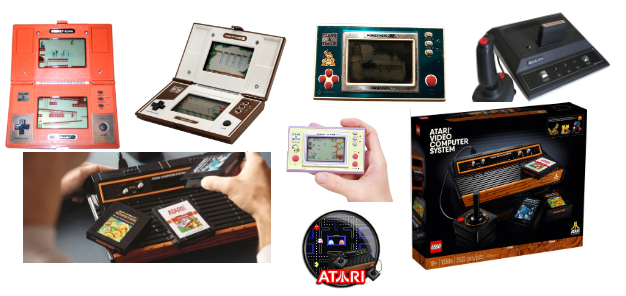

In [22]:
df_80 = data.query('year_of_release > = 1980 and year_of_release < 1990')
df_80_x= pd.DataFrame(df_80.groupby('platform')['name'].count())

# x----------------------------------Estilizando ----------------------------------X
df_80_x[['name']].style.background_gradient(cmap='Reds')

In [23]:
total = df_80['total_sales'].sum()
df_80['Percentual'] = (df_80['total_sales'] / total) * 100
df_80_y = df_80.copy()
df_80_y.reset_index()
df_80_y = df_80_y[['name','platform','total_sales','Percentual']]

# x----------------------------------Estilizando ----------------------------------X
df_80_y.head(20).style.bar(subset = 'Percentual',color='lightblue') \
             .applymap(lambda x: f"color: {'blue' if x > 5.000000 else 'black'}",subset='total_sales')

Identificamos que na década de 80 o jogo Super Mario e suas versões já lideram as vendas, já fazendo da nintendo como uma grande empresa na area de games, liderando este mercado.

#### 📢 Uma olhada na história 🔎 Década 90

Na década de 90 , algumas plataformas se destacaram no mercado de games. A Game Boy (GB), desenvolvido pela Nintendo, liderou o segmento de jogos portáteis. A Nintendo manteve sua liderança ao lançar o Super Nintendo Entertainment System (SNES), o segundo console de mesa da empresa e sucessor do Nintendo Entertainment System (NES). O SNES apresentou gráficos e recursos de som avançados em comparação com outros consoles da época.

Outra plataforma que teve grande destaque no início dos anos 90 foi o Sega Genesis, conhecido como Mega Drive em regiões fora da América do Norte. Desenvolvido e vendido pela Sega, o Genesis era um console de videogame de 16 bits. Ele foi lançado pela primeira vez no Japão em 29 de outubro de 1988, na América do Norte em 14 de agosto de 1989 e nas regiões PAL em 1990. O Genesis foi o terceiro console da Sega e o sucessor do Master System.

Já o Nintendo 64 (com a grafia estilizada NINTENDO64 e frequentemente abreviado como N64) foi um console de jogos eletrônicos da quinta geração, lançado pela Nintendo em 23 de junho de 1996 no Japão. Ele representou uma revolução no mercado da época devido à sua arquitetura de 64 bits, que permitiu a introdução de gráficos em 3D nos jogos, tornando-os mais imersivos. O N64 marcou a quinta geração de consoles da Nintendo.

Na década de 90, a chegada do PlayStation causou um impacto significativo nos jogadores, levando gradualmente ao afastamento dos gêneros 2D tradicionais. O PlayStation foi lançado nessa época e marcou o início de uma nova era.

Além disso, a Sega lançou o Dreamcast em 27 de novembro de 1998 no Japão, 9 de setembro de 1999 na América do Norte e 14 de outubro de 1999 na Europa. Esse console foi o pioneiro da sexta geração de consoles, antecedendo o PlayStation 2 da Sony, o GameCube da Nintendo e o Xbox da Microsoft. O Dreamcast foi o último console doméstico produzido pela Sega, encerrando os 18 anos de presença da empresa no mercado de consoles.

Outro console relevante dessa época foi o Sega Saturn, lançado pela Sega em 22 de novembro de 1994 no Japão, 11 de maio de 1995 na América do Norte, 30 de agosto de 1995 no Brasil e 8 de julho na Europa. O Saturn foi o sucessor bem-sucedido do Sega Genesis e possuía uma arquitetura de CPU dupla e oito processadores. Seus jogos utilizavam a mídia CD-ROM e sua biblioteca de jogos incluía diversos portes de jogos de arcade, bem como títulos originais desenvolvidos especificamente para o console.

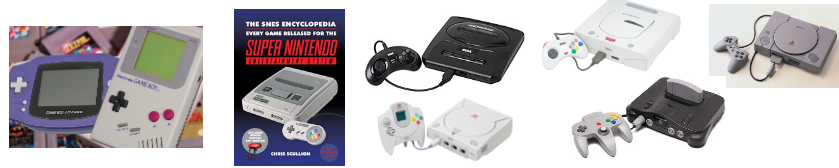

In [24]:
df_90 = data.query('year_of_release > = 1990 and year_of_release < 2000')
df_90_x= pd.DataFrame(df_90.groupby('platform')['name'].count())

# x----------------------------------Estilizando ----------------------------------X
df_90_x[['name']].style.background_gradient(cmap='Reds')


In [25]:
total = df_90['total_sales'].sum()
df_90['Percentual'] = (df_90['total_sales'] / total) * 100
df_90_y = df_90.copy()
df_90_y.reset_index()
df_90_y = df_90_y[['name','platform','total_sales','Percentual']]

# x----------------------------------Estilizando ----------------------------------X
df_90_y.head(20).style.bar(subset = 'Percentual',color='lightblue') \
             .applymap(lambda x: f"color: {'blue' if x > 5.000000 else 'black'}",subset='total_sales')

Já na década de 90 podemos perceber que Pokemom foi o jogo que mais se destacou, assim como os game boys como plataforma portáteis lideram estes anos.

#### 📢 Uma olhada na história 🔎 Década 2000

No dia 4 de março de 2000, a indústria dos videogames foi transformada para sempre. Há quase 20 anos, a Sony lançou o PlayStation 2 no Japão, que se tornaria o console mais bem-sucedido da história.

No entanto, essa trajetória de sucesso já havia sido iniciada pelo primeiro PlayStation. Então, o que mudou? Os impressionantes gráficos da época permitiram uma variedade maior de gêneros do que nunca. Os jogos passaram a ter uma complexidade em outra dimensão, com personagens cada vez mais realistas em termos de comportamento e aparência. Esses e outros fatores elevaram o PS2 a um novo patamar na indústria.

Em 2001, o Game Boy Advance (GBA) foi lançado, gerando grande entusiasmo por ser praticamente um Super Nintendo de bolso, com características semelhantes a um console que, embora de gerações anteriores, ainda não havia completado dez anos. É por isso que muitos dos seus jogos são portes extremamente competentes dos títulos desse console. Como o GBA foi um aparelho marcante, o Showmetech compilou uma lista com os melhores jogos do Game Boy Advance.

O Xbox é o primeiro console da série Xbox fabricada pela Microsoft. Foi lançado em 15 de novembro de 2001 na América do Norte, seguido pelo Japão em 22 de fevereiro de 2002, Austrália e Europa em 14 de março de 2002. Este foi o primeiro passo da Microsoft no mercado de consoles, competindo com o PlayStation 2 da Sony, o GameCube da Nintendo e o Dreamcast da Sega. A Microsoft se tornou a terceira empresa americana a projetar e fabricar um console, depois da Atari e da 3DO Company. A Atari encerrou a produção do Jaguar em 1996 e parou de fabricar consoles.

Por outro lado, o Grand Chase, um RPG multiplayer online desenvolvido pela KOG Games, conquistou uma legião de fãs ao longo dos anos e deixou saudades em todo o mundo. Felizmente, como muitos já devem saber (a notícia já está espalhada pela internet), o jogo está retornando "das cinzas" como uma versão clássica totalmente traduzida no Steam. Isso significa que poderemos desfrutar da interface, legendas e dublagem em português, assim como fazíamos quando o jogo foi lançado aqui.

Grand Chase é uma série de jogos desenvolvida pela empresa sul-coreana KOG Studios. Sua primeira versão foi lançada em 2003 como um jogo de luta 2D online, disponível exclusivamente para computador. Com jogabilidade simples e gráficos que lembram desenhos animados japoneses, o Grand Chase obteve sucesso em todos os continentes onde foi distribuído e alcançou a marca de 20 milhões de usuários.

O Wii, oficialmente conhecido como Nintendo Wii, é um console doméstico de jogos eletrônicos da sétima geração, desenvolvido e comercializado pela Nintendo. Foi lançado em 19 de novembro de 2006 como sucessor do console GameCube, com o objetivo de competir com os consoles Xbox 360 da Microsoft e PlayStation 3 da Sony, visando alcançar um público-alvo mais amplo que a concorrência.

Uma das inovações do Wii foi o controle Wii Remote, que pode ser utilizado como um dispositivo apontador portátil, contando com giroscópio e acelerômetro. O console reproduz jogos armazenados em discos ópticos Wii, fabricados pela Matsushita (Panasonic).

Por sua vez, o Nintendo DS, lançado em novembro de 2004, foi o console portátil mais bem-sucedido da Nintendo. Como sucessor da linha Game Boy, o DS se destacou por suas duas telas (daí o nome "Dual Screen") e o uso de uma caneta Stylus para comandos por toque.

Apesar da forte concorrência da Sony com o PSP, o Nintendo DS triunfou graças à sua rica biblioteca de jogos, repleta de títulos diversificados que não tinham medo de serem criativos e apresentarem mecânicas de jogo inovadoras.


In [26]:
df_2000 = data.query('year_of_release > = 2000 and year_of_release < 2010')
df_2000_x= pd.DataFrame(df_2000.groupby('platform')['name'].count())

# x----------------------------------Estilizando ----------------------------------X
df_2000_x[['name']].style.background_gradient(cmap='Reds')

In [27]:
total = df_2000['total_sales'].sum()
df_2000['Percentual'] = (df_2000['total_sales'] / total) * 100
df_2000_y = df_2000.copy()
df_2000_y.reset_index()
df_2000_y = df_2000_y[['name','platform','total_sales','Percentual']]

# x----------------------------------Estilizando ----------------------------------X
df_2000_y.head(20).style.bar(subset = 'Percentual',color='lightblue') \
             .applymap(lambda x: f"color: {'blue' if x > 5.000000 else 'black'}",subset='total_sales')

Em relação aos jogos durante esta década podemos perceber que o gênero jogos de esportes, foram mais relevantes que os demais como Super Mario e Pokemom na década anterior.

#### 📢 Uma olhada na história 🔎 Década 2010 a 2016


O PlayStation 4 (oficialmente abreviado como PS4) é uma console de videojogos da oitava geração, com arquitetura x86, produzido pela empresa Sony Interactive Entertainment. Foi lançado em novembro de 2013 como a quarta edição da série PlayStation, sucedendo a PlayStation 3. O PS4 competiu diretamente com o Wii U da Nintendo e o Xbox One da Microsoft.

Por sua vez, o Nintendo 3DS é um console portátil produzido pela Nintendo, lançado em 26 de fevereiro de 2011 no Japão e 27 de março de 2011 nos Estados Unidos. Sua grande novidade em termos de hardware foi a tela que permitia visualizar imagens em 3D sem a necessidade de óculos.

O Xbox One é uma linha de consoles de videogames domésticos da oitava geração, desenvolvida pela empresa Microsoft e lançada em 2013 como a terceira edição da série Xbox e sucessora do Xbox 360. Ele competiu diretamente com os consoles PlayStation 4 e Nintendo Switch. O Xbox One foi lançado oito anos após o Xbox 360 e oferece jogos com gráficos de alta definição superiores aos vistos em seu antecessor. Foi anunciado em 21 de maio de 2013, apresentado ao público por Don Mattrick, presidente de negócios de entretenimento interativo da Microsoft, no evento especial Xbox Reveal, como o sucessor do Xbox 360.

Por sua vez, o Playstation Vita (PS Vita) foi lançado em 2012 em todo o mundo e foi o último console portátil da Sony. Embora tenha sido descontinuado em 2019, o dispositivo foi revitalizado pela cena homebrew e recebeu adaptações de jogos famosos, além de possuir uma biblioteca de jogos bastante singular. Ao longo de cerca de oito anos no mercado, foram vendidas mais de 16 milhões de unidades do PS Vita. Apesar disso, o console ficou atrás dos concorrentes diretos da Nintendo e do PlayStation Portable (PSP).



In [28]:
df_2010 = data.query('year_of_release > = 2010 and year_of_release < 2020')
df_2010_x= pd.DataFrame(df_2010.groupby('platform')['name'].count())

# x----------------------------------Estilizando ----------------------------------X
df_2010_x[['name']].style.background_gradient(cmap='Reds')

In [29]:
total = df_2010['total_sales'].sum()
df_2010['Percentual'] = (df_2010['total_sales'] / total) * 100
df_2010_x = df_2010.copy()
df_2010_x.reset_index()
df_2010_x = df_2010_x[['name','platform','total_sales','Percentual']]

# x----------------------------------Estilizando ----------------------------------X
df_2010_x.head(20).style.bar(subset = 'Percentual',color='lightblue') \
             .applymap(lambda x: f"color: {'blue' if x > 5.000000 else 'black'}",subset='total_sales')

Já nesta década percebemos que Play Station e Xbox dominaram o cenário de games fazendo da microsoft uma grande líder de vendas nesta década

### 📣 Plataformas mais populares de Games que mais venderam ao longo dos anos 💰

#### Plataforma X360

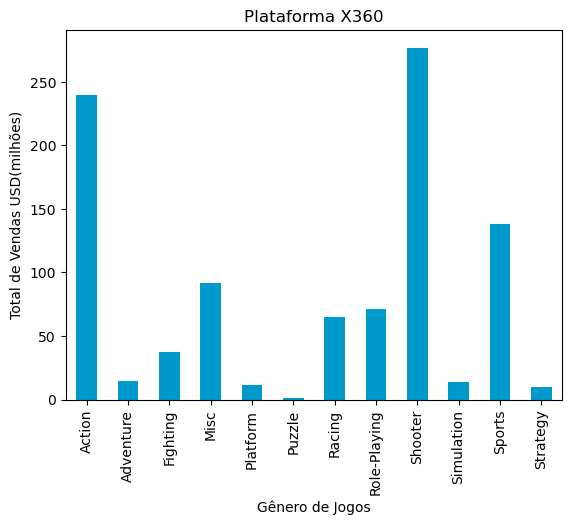

In [30]:
# Plataforma X360 GENERO
x360 = data[data['platform'] == 'X360'].reset_index()
#-------------------Estilizando Gráfico-----------------------#
x360.groupby('genre')['total_sales'].sum().plot(kind='bar',color='#0099cc');
plt.title('Plataforma X360')
plt.ylabel('Total de Vendas USD(milhões)');
plt.xlabel('Gênero de Jogos');

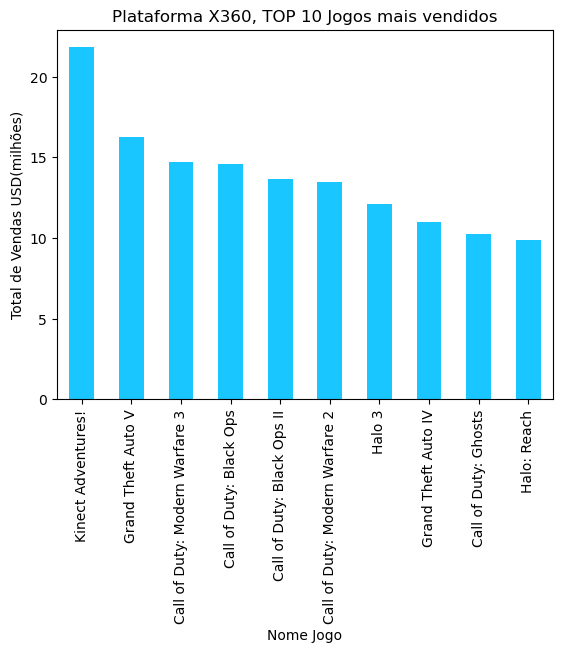

In [31]:
# Plataforma X360 NOME JOGO
x360 = data[data['platform'] == 'X360'].reset_index()
#-------------------Estilizando Gráfico-----------------------#
x360.groupby('name')['total_sales'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar',color='#1ac6ff');
plt.title('Plataforma X360, TOP 10 Jogos mais vendidos')
plt.ylabel('Total de Vendas USD(milhões)');
plt.xlabel('Nome Jogo');


As duas plataformas que obtiveram as maiores vendas ao longo desses 35 anos foram o X360 e o DS. Ao analisarmos os gêneros e os jogos mais vendidos em cada plataforma, observamos as seguintes estatísticas:

Na plataforma X360, os gêneros de jogos de ação e shooter (atirador) lideram, ultrapassando a marca dos 200 milhões de dólares em vendas. O jogo mais vendido nessa plataforma foi "Kinect Adventures". O gráfico acima apresenta os 10 jogos mais vendidos nessa plataforma.

#### Plataforma DS - Nintendo

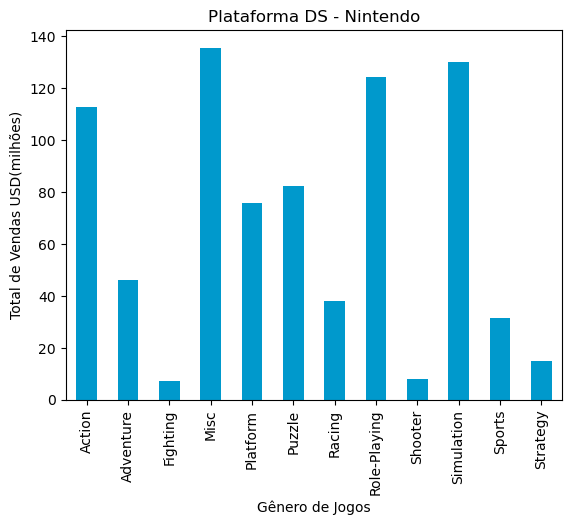

In [32]:
# Plataforma DS GENERO
x360 = data[data['platform'] == 'DS'].reset_index()
#-------------------Estilizando Gráfico-----------------------#
x360.groupby('genre')['total_sales'].sum().plot(kind='bar',color='#0099cc');
plt.title('Plataforma DS - Nintendo')
plt.ylabel('Total de Vendas USD(milhões)');
plt.xlabel('Gênero de Jogos');

In [33]:
# Plataforma DS NOME JOGO
x360 = data[data['platform'] == 'DS'].reset_index()
#-------------------Estilizando Gráfico-----------------------#
x360.groupby('name')['total_sales'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar',color='#1ac6ff');
plt.title('Plataforma DS, TOP 10 Jogos mais vendidos')
plt.ylabel('Total de Vendas USD(milhões)');
plt.xlabel('Nome Jogo');

A plataforma Nintendo DS apresenta vendas equilibradas nos seguintes gêneros de jogos: Action, Misc, Role-playing e Simulation, ultrapassando a marca dos 100 milhões de dólares. O jogo mais vendido nessa plataforma foi "New Super Mario Bros". Acima estão listados os outros 10 jogos mais vendidos ao longo dos anos.

###  👀 Zoom entre os anos de 2007 a 2010 ( Anos de Maiores Vendas ) 

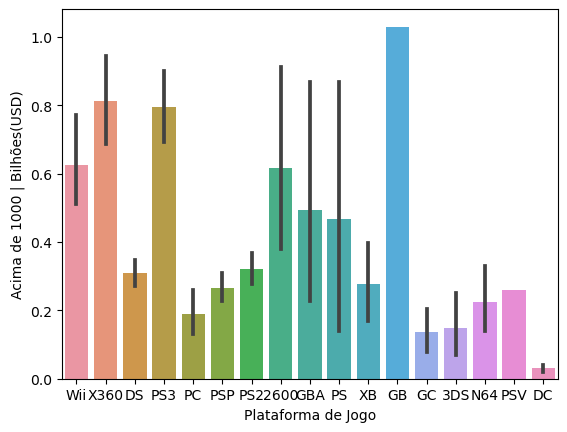

In [34]:
# verificando plataformas que obtiveram maior número de vendas entre 2008 a 2010
w = data.query('year_of_release >= 2007 & year_of_release < 2011 ')
#-------------------Estilizando Gráfico-----------------------#
sns.barplot(data=w, x="platform", y="total_sales");
plt.ylabel('Acima de 1000 | Bilhões(USD)');
plt.xlabel('Plataforma de Jogo');

É perceptível que durante o período de 2008 a 2010, três plataformas alcançaram vendas superiores a 500 milhões dólares, com destaque para X360, PS3 e Wii, que registraram um volume de vendas acima de 800 milhões de dólares.

Ao analisarmos os dados e abrirmos as informações nos anos em que as plataformas de jogos apresentaram um crescimento mais exponencial em suas vendas, identificamos um cenário distinto. A plataforma X360 continua liderando as vendas, porém, juntam-se a ela o PS3 e o Wii, que também se destacaram no ranking de vendas nesses anos.

Tanto o X360 quanto o PS3 conseguiram ultrapassar a marca de 800 milhões de dólares em vendas, evidenciando seu sucesso nesse período. Essas plataformas foram responsáveis por um crescimento significativo na indústria de jogos durante esses anos, conquistando uma posição de destaque no mercado.

In [35]:
# Fatiando dados e criando novo dataframe
X360 = w[w['platform'] == 'X360']
X360.groupby(['name','genre'])['total_sales'].sum().sort_values(ascending=False)
X360 = pd.DataFrame(X360).reset_index(drop=True)
# ---------------------#---------------------#-----------------#------------------------#
PS3 = w[w['platform'] == 'PS3']
PS3.groupby(['name','genre'])['total_sales'].sum().sort_values(ascending=False)
PS3 = pd.DataFrame(PS3).reset_index(drop=True)
# ---------------------#---------------------#-----------------#------------------------#
Wii = w[w['platform'] == 'Wii']
Wii.groupby(['name','genre'])['total_sales'].sum().sort_values(ascending=False)
Wii = pd.DataFrame(Wii).reset_index(drop=True)
# ---------------------#---------------------#-----------------#------------------------#
# concatenando dataframes
df = [X360 , PS3, Wii]
df = pd.concat(df)

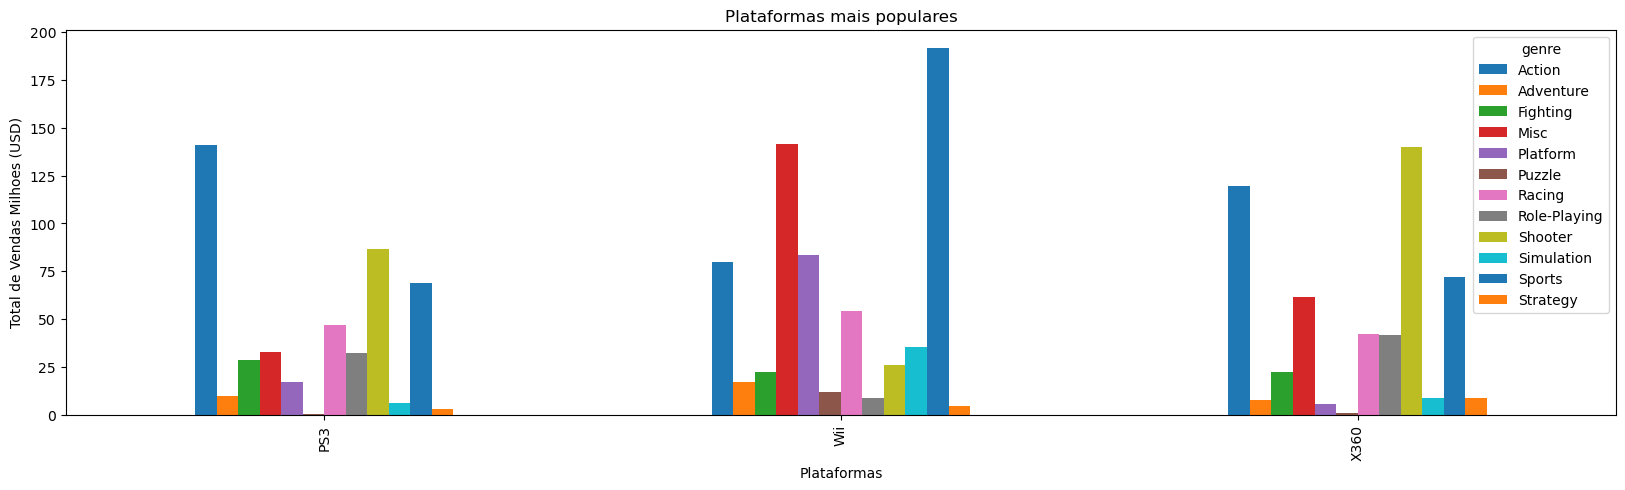

In [36]:
df1 = df.pivot_table(index='platform',columns='genre',values='total_sales',aggfunc='sum')
df1.plot(kind='bar', figsize=(20,5));
#-------------------Estilizando Gráfico-----------------------#
plt.xlabel('Plataformas')
plt.ylabel('Total de Vendas Milhoes (USD)')
plt.title('Plataformas mais populares');

Ao realizar uma análise dos dados com um gráfico de barras das três plataformas de jogos mais populares e observar seus respectivos gêneros, podemos notar que a plataforma Wii se destaca em relação aos jogos de esportes e miscelânea, enquanto o PS3 e o X360 se destacam principalmente nos gêneros de ação. No caso específico da X360, seu maior destaque está nos jogos do gênero shooter. Isso indica que a plataforma Wii tem uma maior visibilidade no segmento de jogos esportivos e misc, enquanto o PS3 e o X360 são mais reconhecidos por suas ofertas no gênero de ação, com a X360 também se destacando em jogos do gênero shooter.

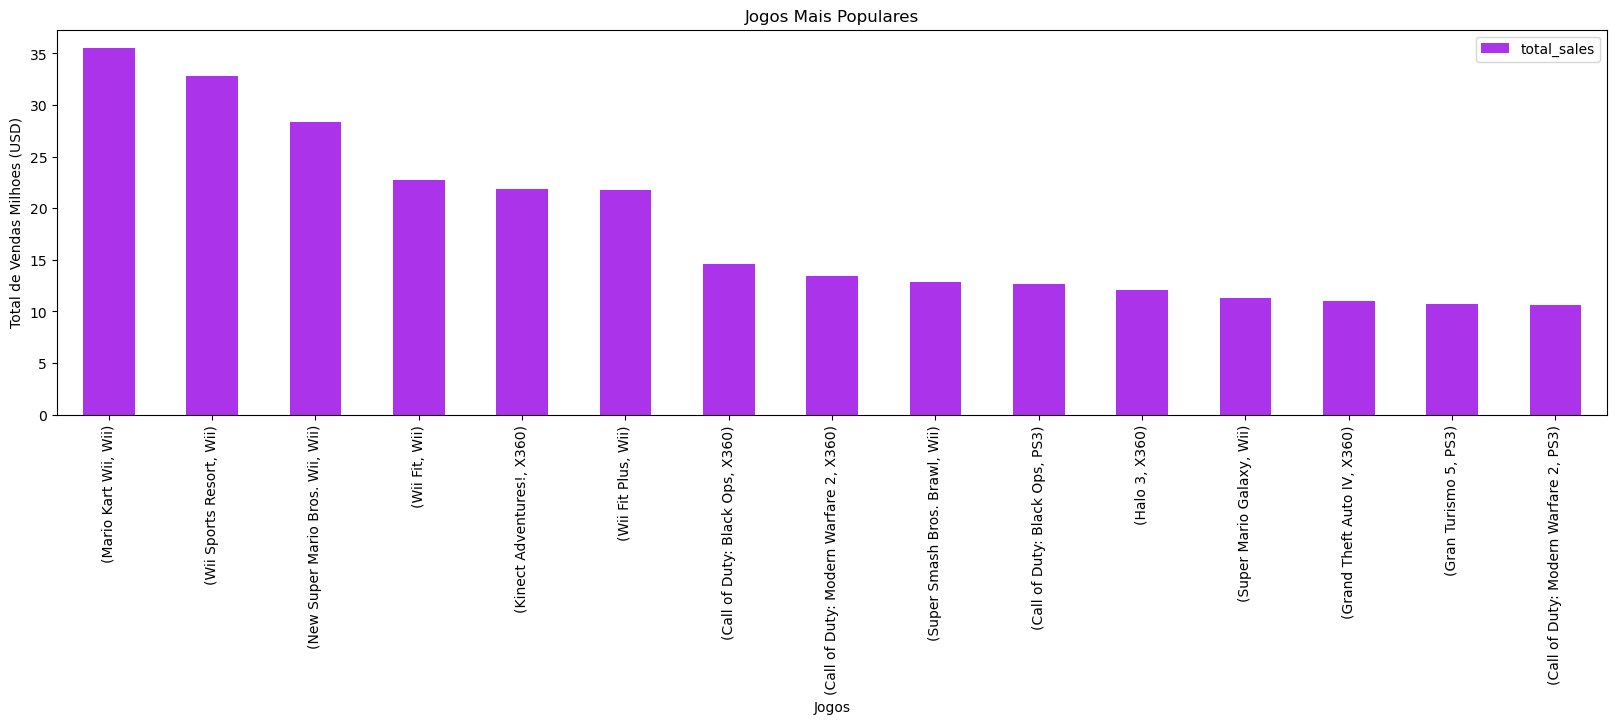

In [37]:
df2 = df.groupby(['name','platform'])['total_sales'].sum().sort_values(ascending=False).head(15)
df2 = pd.DataFrame(df2)
#-------------------Estilizando Gráfico-----------------------#
df2.plot(kind='bar', figsize=(20,5),color='#ab34eb');
plt.xlabel('Jogos')
plt.ylabel('Total de Vendas Milhoes (USD)')
plt.title('Jogos Mais Populares');

No total de vendas temos como jogo mais vendido Super Mario e suas versões, o que é interessante de verificar que é dentro da plataforma Wii que tem como característica, seus controles de movimento foram considerados uma verdadeira revolução para a indústria de jogos

### Dispersões de forma global 

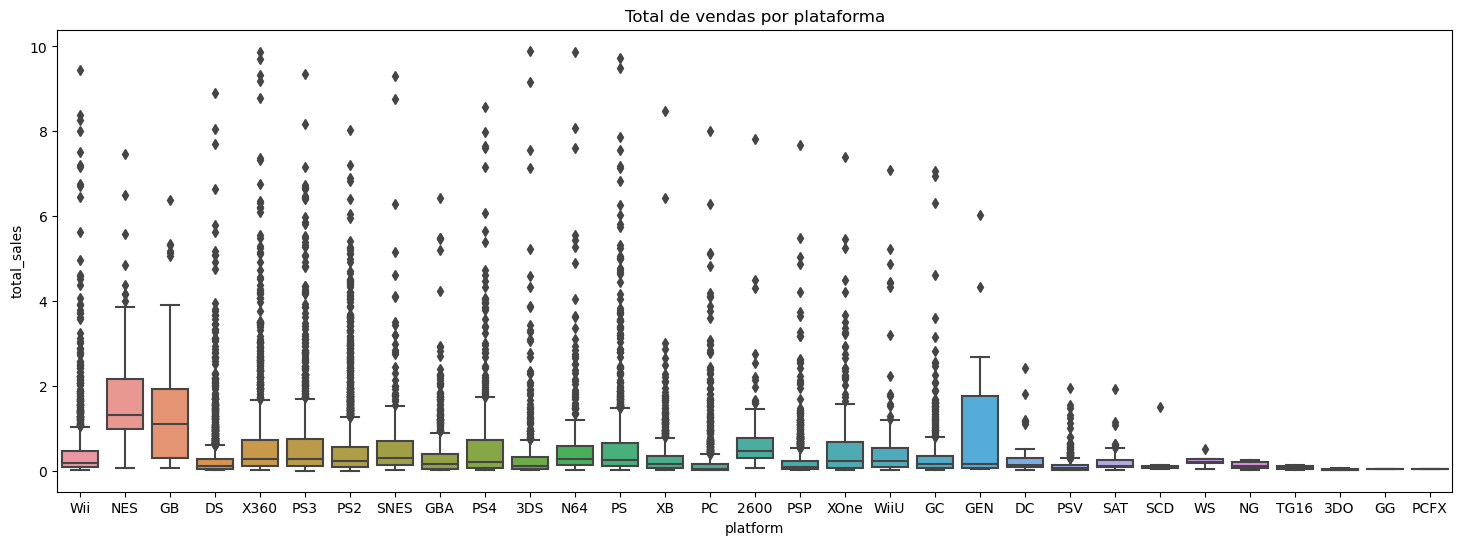

In [38]:
# gráfico de dispersão plataformas

plt.figure(figsize=(18,6))
plt.title("Total de vendas por plataforma")
sns.boxplot(data=data[data.total_sales <= 10],y='total_sales', x="platform", order=data.groupby('platform', sort=False)['total_sales'].max().index);

No gráfico boxplot temos a visibilidade importante de como as médias de vendas e menores números de outliers, das plataformas NES e GB (ambas nintendo ) são muito maiores que as demais plataformas, em contra partida plataformas populares como Wii, PS, PS2, PS3 ,PS4, X360, também como as vistas como mais populares possuem alto número de outliers que seriam dados atípicos e médias mais baixas em comparação com NES e GB.

#### Score Avaliação Crítica - Profissional & Usuários

<iframe src="https://www.kaggle.com/embed/gulsahdemiryurek/video-game-sales-exploratory-data-analysis?cellIds=49&kernelSessionId=13458424" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Video Game Sales Exploratory Data Analysis"></iframe>

Text(0, 0.5, 'Total Vendas')

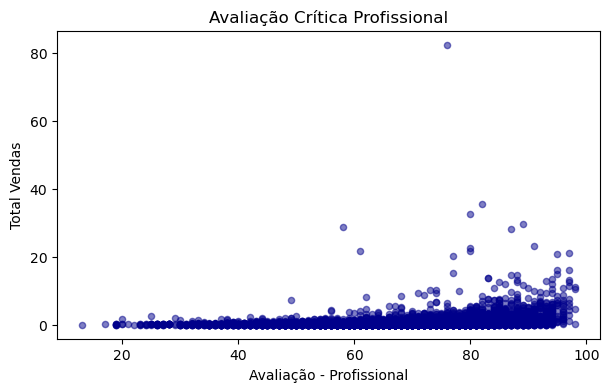

In [39]:
data.plot(kind='scatter', x='critic_score', 
              y='total_sales', alpha=0.5, 
              color='darkblue', figsize = (7,4));
#-------------------------Estilizando--------------------------------#
plt.title('Avaliação Crítica Profissional')
plt.xlabel("Avaliação - Profissional")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

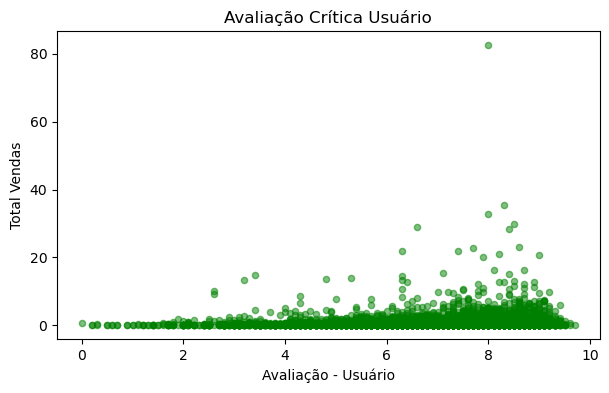

In [40]:
data.plot(kind='scatter', x='user_score', 
              y='total_sales', alpha=0.5, 
              color='green', figsize = (7,4));
#-------------------------Estilizando--------------------------------#
plt.title('Avaliação Crítica Usuário')
plt.xlabel("Avaliação - Usuário")
plt.ylabel("Total Vendas")

Ao analisarmos as avaliações de críticos profissionais e usuários, é possível observar uma correlação entre essas avaliações e as vendas dos jogos, porém temos casos em que jogos tem uma potencial venda sem estar vinculado a avaliação. Quando um jogo recebe avaliações positivas tanto por parte dos críticos quanto dos usuários, isso tende a estar correlacionado com um maior número de vendas. Em outras palavras, quando um jogo é bem avaliado por ambos os grupos, isso geralmente indica um desempenho de vendas mais favorável. Essa correlação entre avaliações positivas e vendas sugere que a opinião tanto dos críticos quanto dos usuários desempenha um papel importante na decisão dos consumidores em adquirir determinado jogo.

### Perfil de usuário por região

In [41]:
# selecionando regiões e vendas em novo dataframe
df_year = data[['platform','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales','year_of_release']]
yearly_sales = df_year.groupby('year_of_release').sum()

# criando gráfico para plotar as linhas de cada região
fig = go.Figure()
for i, market in enumerate(yearly_sales.columns[:-1]):
    fig.add_trace(go.Scatter(x=yearly_sales.index, y=yearly_sales[market], mode='lines', name=market, line=dict()))

# adicionando a linha das vendas totais
fig.add_trace(go.Scatter(x=yearly_sales.index, y=yearly_sales['total_sales'], mode='lines', name='Total Vendas', line=dict()))

# Inserindo labels no gráfico
fig.update_layout(xaxis_title='year_of_release', yaxis_title='Vendas (Milhões USD)', title='Total de Vendas Por Ano')
fig.show()

Ao analisarmos as vendas por região e traçarmos um perfil do usuário com base em sua localidade, podemos observar que os principais consumidores de jogos estão concentrados na América do Norte, seguidos pela Europa, outras regiões e, por último, o Japão. Essa análise indica que a América do Norte possui uma base de usuários com maior interesse e engajamento na compra de jogos, seguida pela Europa. Outras regiões também apresentam um nível de consumo considerável, embora menor em comparação com as duas primeiras regiões mencionadas. Já o Japão, embora seja uma importante referência no mercado de jogos, mostra-se com vendas comparativamente menores em relação às demais regiões mencionadas.

#### Plataforma


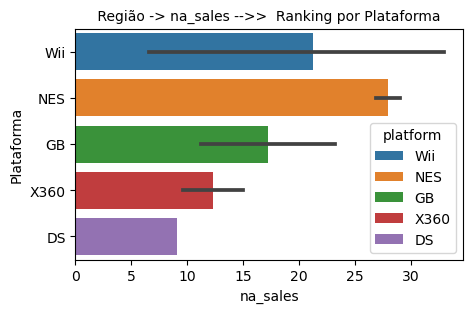

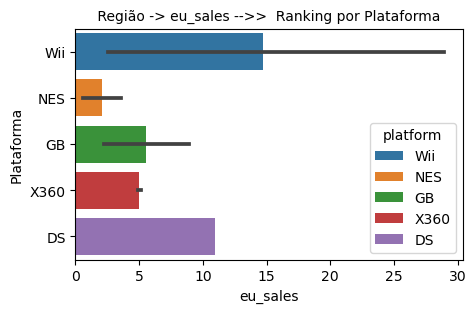

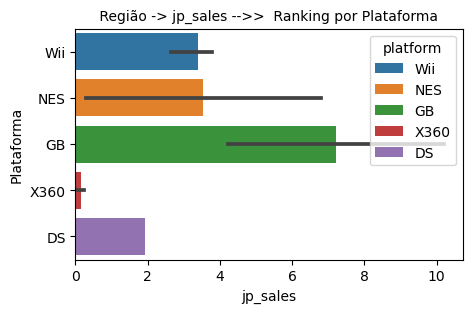

In [42]:
df_aux = data[['platform','genre','na_sales','eu_sales','jp_sales']]\
                .loc[data.groupby('genre').na_sales.agg('idxmax')]\
                .sort_values('na_sales',ascending=False)[0:10].head(10)\
                .set_index('genre')
vendas = ['na_sales','eu_sales','jp_sales']
for v in vendas:
    plt.figure(figsize = (5,3))
    sns.barplot(x = v, y = 'platform', hue='platform', data=df_aux, dodge=False)
    plt.title(f" Região -> {v} -->>  Ranking por Plataforma ",size=10)
    plt.ylabel('Plataforma', size=10)    

Ao analisar o perfil por região em relação às preferências de plataforma de jogos, podemos observar padrões distintos. Na América do Norte, os usuários têm uma preferência pelo uso do Wii e do NES. Na Europa, podemos perceber que os usuários são mais ativos no uso do Wii e do DS (Nintendo DS). Já no Japão, os usuários dão preferência aos portáteis da Game Boy. Essas diferenças regionais revelam as preferências culturais e históricas dos usuários em relação às plataformas de jogos. O Wii e o DS tiveram um impacto significativo tanto na América do Norte quanto na Europa, enquanto os consoles portáteis da Game Boy são mais populares no Japão, refletindo as tendências e preferências específicas desse mercado.

#### Gênero

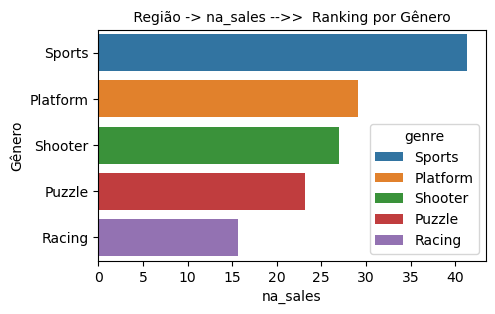

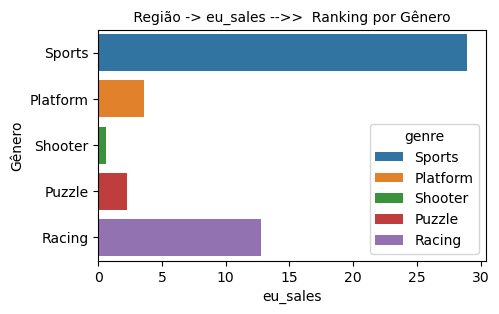

In [43]:
df_aux = data[['platform','genre','na_sales','eu_sales','jp_sales']]\
                .loc[data.groupby('genre').na_sales.agg('idxmax')]\
                .sort_values('na_sales',ascending=False)[0:10].head(5)\
                .set_index('platform')
vendas = ['na_sales','eu_sales','jp_sales']
for v in vendas:
    plt.figure(figsize = (5,3))
    sns.barplot(x = v, y = 'genre', hue='genre', data=df_aux, dodge=False)
    plt.title(f" Região -> {v} -->>  Ranking por Gênero ",size=10)
    plt.ylabel('Gênero', size=10)    

Quanto aos gêneros de jogos, podemos observar preferências distintas em cada região. Na América do Norte, os jogos de esportes são os mais preferidos. Essa preferência se estende também à Europa, onde os jogos de esportes são populares entre os usuários. Por outro lado, no Japão, há uma preferência pelo segmento de jogos de plataforma. Essa diferenciação reflete as preferências culturais e as características únicas de cada região. Enquanto os jogos de esportes têm um apelo mais amplo na América do Norte e na Europa, o Japão possui uma tradição de jogos de plataforma, que são amplamente apreciados pelos jogadores japoneses.

In [44]:
correlacao = df_aux_ESRB.corr()
plt.figure(figsize=(10,4))
plt.title("Mapa de Calor - ESRB")
sns.heatmap(correlacao, vmax=.8, square=True);

NameError: name 'df_aux_ESRB' is not defined

O objetivo desta análise é examinar se a classificação da ESRB impacta nas vendas de jogos em diferentes regiões. Podemos observar que os jogos com classificação para adultos (AO) não têm impacto na América do Norte e na Europa, pois, pelo contrário, eles apresentam a maior média de vendas nessas regiões. No entanto, no Japão, a classificação AO afeta as vendas. Da mesma forma, a classificação "M" (maduro) tem uma média de vendas mais alta na Europa e na América do Norte, enquanto no Japão as vendas são afetadas por essa classificação. Jogos com classificação "RP" (classificação pendente) têm uma média de vendas baixa, o que pode ser atribuído ao fato de que esses jogos ainda estão em avaliação e não possuem uma classificação definitiva. Isso pode ser um dos motivos pelos quais a média de vendas varia por região para essa segmentação. Por outro lado, as classificações "E" (todos) e "E10+" (todos acima de 10 anos) têm a maior média de vendas no Japão, indicando que o conteúdo voltado para todas as idades é mais popular nessa região.

### Teste de hipóteses

##### Teste de Normalidade para as Médias avaliação dos usuários para as plataformas Xbox One e PC

##### Plataforma Xbox One

In [ ]:
from scipy.stats import normaltest
from scipy import stats as st

In [ ]:
# valor de significancia agregado ao estudo
significancia = 0.05

In [ ]:
# fatiando os dados para eliminar valores nulos para a plataforma
df_us = data[data['user_score'].notnull()]
df_XOne = df_us.query('platform == "XOne"')

In [ ]:
df_XOne['user_score'].hist();

In [ ]:
# realizando teste de normalidade usando a biblioteca scpiy
stat_test, p_valor = normaltest(df_XOne.user_score)
print(stat_test)
print(p_valor)

In [ ]:
# verificando se valor de P_valor é menor que significancia 
if p_valor <= significancia:
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

##### Plataforma PC

In [ ]:
# fatiando os dados para eliminar valores nulos para a plataforma
df_us = data[data['user_score'].notnull()]
df_PC = df_us.query('platform == "PC"')

In [ ]:
df_PC['user_score'].hist();

In [ ]:
# realizando teste de normalidade usando a biblioteca scpiy
stat_test, p_valor = normaltest(df_PC.user_score)
print(stat_test)
print(p_valor)

In [ ]:
# verificando se valor de P_valor é menor que significancia 
if p_valor <= significancia:
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

Ao realizar o teste de normalidade entre as duas plataformas para ambas foram rejeitadas a hipótese Zero, pois dado ao nível de significancia em 0.05 e o teste realizado ambas são menores que o valor de significancia parametrizado para este estudo. 

Também ao plotar os histogramas para as plataformas, podemos já observar que não possui a forma de sino de forma simétrica descartando esta hipótese através da verificação visual.

Realizei esta verificação pois, o teste de normalidade é uma técnica estatística usada para verificar se uma amostra de dados segue uma distribuição normal ou gaussiana. A distribuição normal é uma das distribuições mais comuns encontradas em estatística, sendo caracterizada por uma forma de sino simétrica.

###  Classificações médias dos usuários das plataformas Xbox One e PC são as mesmas?


Vamos realizar uma análise das médias populacionais das plataformas Xbox One e PC. Construiremos hipóteses e testaremos se essas médias são iguais.

Considerando que:

- H0 representa a hipótese nula de que as médias entre as duas são iguais.
- H1 é a hipótese alternativa no caso de não serem iguais.

Levaremos em consideração um nível de significância de 0.05 (alpha) e realizaremos os testes utilizando a biblioteca scipy.stats.ttest_ind e scipy.stats.levene

In [ ]:
sample_1 = df_XOne['user_score'][df_XOne['user_score'].notna()].tolist()
sample_2 = df_PC['user_score'][df_PC['user_score'].notna()].tolist()
alpha = 0.05
stat, p_value = st.levene(sample_1, sample_2)
result_levene = p_value

if result_levene < alpha:
    print('Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste')
else:
    print('Não rejeitamos H0, variancias não são diferentes, equal_var = Verdadeiro para o teste')

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Amostra de variâncias:', var_sample)

In [ ]:
alpha = 0.05  # nível crítico de significância estatística

results = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

In [ ]:
print('A média da avaliação de usuários do XOne: {:.2f}'.format(df_XOne['user_score'][df_XOne['user_score'].notna()].mean()))
print('A média da avaliação de usuários do PC:  {: .2f}'.format(df_PC['user_score'][df_PC['user_score'].notna()].mean()))

Obtivemos o resultado do teste de Levene, no qual não rejeitamos a hipótese nula. Isso indica que as variâncias não são diferentes. Além disso, ao analisarmos o valor-p, que ficou abaixo do nível de significância, constatamos que as médias são diferentes. Ao compararmos as médias entre as duas plataformas, percebemos que a média de avaliação dos usuários de PC é 0,54 maior do que a do XOne.

### Classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes?

Vamos realizar uma análise das médias populacionais das plataformas Action e Sports, bem como das médias entre os gêneros de Construiremos hipóteses e testaremos se essas médias são iguais.

Considerando que:

- H0 representa a hipótese nula de que as médias entre as duas são iguais.
- H1 é a hipótese alternativa no caso de não serem iguais.

Levaremos em consideração um nível de significância de 0.05 (alpha) e realizaremos os testes utilizando a biblioteca scipy.stats.ttest_ind e scipy.stats.levene

In [ ]:
df_action = data.query('genre == "Action" and user_score.notnull()')
df_sport = data.query('genre == "Sports" and user_score.notnull()')


In [ ]:
sample_1 = df_action['user_score'][df_action['user_score'].notna()].tolist()
sample_2 = df_sport['user_score'][df_sport['user_score'].notna()].tolist()
alpha = 0.05
stat, p_value = st.levene(sample_1, sample_2)
result_levene = p_value

if result_levene < alpha:
    print('Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste')
else:
    print('Não rejeitamos H0, variancias não são diferentes, equal_var = Verdadeiro para o teste')

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Amostra de variâncias:', var_sample)

In [ ]:
alpha = 0.05  # nível crítico de significância estatística

results = st.ttest_ind(
    df_action['user_score'], df_sport['user_score'], equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

In [ ]:
print('A média da avaliação de usuários gênero Ação: {:.2f}'.format(df_action['user_score'][df_action['user_score'].notna()].mean()))
print('A média da avaliação de usuários gênero PC  :{: .2f}'.format(df_sport['user_score'][df_sport['user_score'].notna()].mean()))

Ao realizar o teste de Levene nas duas amostras das avaliações médias dos usuários para os gêneros de ação e esportes, rejeitamos a hipótese nula, pois as variâncias são diferentes. No entanto, ao examinarmos as médias, não rejeitamos a hipótese nula, o que indica que, para esse teste, as amostras possuem médias iguais. Além disso, ao observarmos os valores relacionados às médias, percebemos que elas são, de fato, semelhantes.

### Conclusão Geral

Dentro deste estudo, observamos uma história ao longo de 30 anos, com o surgimento de plataformas inovadoras e o descontinuamento de outras. Fica claro que, no mercado de tecnologia, é fundamental estar atualizado em relação às novas tendências que os usuários adotam em relação aos jogos. Nesse contexto, as plataformas que se destacaram foram PlayStation, Wii, Xbox e DS. No que diz respeito aos gêneros de jogos, os mais atrativos para os usuários são os de ação e esportes.

Uma variável importante neste estudo é o lançamento de jogos, que teve um crescimento constante a partir do ano 2000, resultando em um aumento das receitas de vendas. A década de 2000 foi marcada por uma explosão no mundo dos jogos, com o surgimento de novas tecnologias e novos tipos de jogos que conquistaram os usuários.

Destaca-se o papel fundamental do Japão como co-criador dessa cultura de jogos, com seus famosos portáteis que são amplamente consumidos pelos japoneses, além dos mangás, RPGs e outros gêneros que foram incorporados aos video games e disseminados para o restante dos países.

Existem vários tipos de jogos que fizeram muito sucesso ao longo dos anos, mas um jogo que mantém uma base de usuários há mais de 30 anos e continua sendo um dos principais em termos de vendas é o Super Mario e suas variações. A plataforma Wii trouxe uma revolução tecnológica com o escaneamento de imagens e a interatividade para jogar jogos de esportes em uma realidade virtual. Essa plataforma tem se mantido sólida para os usuários interessados nesse gênero, quanto às regiões de destaque em vendas, a América do Norte e a Europa são os principais impulsionadores do mercado.